# Path to Zenodo files folder

In [52]:
path = 'PATH/TO/ZENODO/FILES/FOLDER'

# Figure 3

## Panel b

### FYN-SH3

In [53]:
import pandas as pd

predicted_phenotypes = pd.read_csv(path+'Fig3/FYN-SH3/FYN_mochi_linear/task_1/predictions/predicted_phenotypes_all.txt',
                                  sep='\t', lineterminator='\n')

RT=303*0.001987
predicted_phenotypes['mean_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].mean(axis=1)
predicted_phenotypes['std_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].std(axis=1)

predicted_phenotypes['mean']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].mean(axis=1)
predicted_phenotypes['std']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].std(axis=1)

predicted_phenotypes['mean_dG']= predicted_phenotypes['mean_additive_trait']*RT
predicted_phenotypes['std_dG']= predicted_phenotypes['std_additive_trait']*RT

for index, row in predicted_phenotypes.loc[predicted_phenotypes['WT']!=True].iterrows():
    predicted_phenotypes.at[index,'predicted_fitness']=row['fold_'+str(int(row['Fold']))]
    predicted_phenotypes.at[index,'predicted_ddG']=row['fold_'+str(int(row['Fold']))+'_additive_trait0']*RT

predicted_phenotypes

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,fold_7_additive_trait0,fold_8_additive_trait0,fold_9_additive_trait0,fold_10_additive_trait0,mean_additive_trait,std_additive_trait,mean_dG,std_dG,predicted_fitness,predicted_ddG
0,NaN,TLMVALYDYEARTEDDLSLHKGEKLQVLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,50.0,...,1.738676,1.580215,1.731763,1.725398,1.720939,0.066795,1.036110,0.040215,-0.934863,1.042627
1,NaN,TLMVALYDYEARTEDDLSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,4.0,NaN,NaN,True,False,False,36.0,...,1.569868,1.471284,1.587422,1.514238,1.535895,0.042998,0.924702,0.025887,-1.089000,0.945157
2,NaN,TLMVALYDYEARTEDDMSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,5.0,NaN,NaN,True,False,False,224.0,...,1.687743,1.460112,1.594369,1.595569,1.596292,0.066607,0.961065,0.040101,-1.073463,0.924499
3,NaN,TLFVALYDYEARTEDDMSLHKGEKIQVLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,64.0,...,1.058712,0.981242,1.129326,1.059590,1.061410,0.045082,0.639033,0.027142,-1.427600,0.657826
4,NaN,TLMVALYDYEARTEDDFSFHKGEKFQVLNSSEGDWWEARSLTTGET...,NaN,4.0,NaN,NaN,True,False,False,67.0,...,1.124966,0.967647,0.969147,0.969887,1.048597,0.084119,0.631319,0.050645,-1.373374,0.684296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,NaN,TLVVALYDYEARTEDDVSFHKGEKMQMLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,141.0,...,-1.972810,-1.813875,-1.983783,-1.919989,-1.891374,0.088342,-1.138723,0.053187,-3.834315,-1.155950
9969,NaN,TLIVALYDYEARTEDDISIHKGEKVQLLNSSEGDWWEARSLTTGET...,NaN,7.0,NaN,NaN,True,False,False,92.0,...,-0.625782,-0.488985,-0.470273,-0.468652,-0.507036,0.088877,-0.305267,0.053509,-2.726799,-0.329514
9970,NaN,TLFVALYDYEARTEDDVSVHKGEKLQFLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,73.0,...,-1.869407,-1.669379,-1.741095,-1.785579,-1.796444,0.112935,-1.081569,0.067994,-3.657782,-1.015094
9971,NaN,TLIVALYDYEARTEDDVSMHKGEKFQLLNSSEGDWWEARSLTTGET...,NaN,5.0,NaN,NaN,True,False,False,82.0,...,-2.001870,-1.748369,-1.919490,-1.995474,-1.945269,0.100554,-1.171171,0.060540,-3.904746,-1.231139


In [54]:
import matplotlib.pyplot as plt
from seaborn import kdeplot
import numpy as np

# Normalize data in the -1 to 0 range

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

predicted_phenotypes_scaled = predicted_phenotypes.copy()

reference=predicted_phenotypes.loc[predicted_phenotypes['WT']==True].iloc[0]['core']

fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['fitness']=normalize(list(predicted_phenotypes_scaled['fitness']),{'actual': {'lower': mode, 'upper': predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})


fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='predicted_fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['predicted_fitness']=normalize(list(predicted_phenotypes_scaled['predicted_fitness']),{'actual': {'lower': mode, 'upper': 0}, 'desired': {'lower': -1, 'upper': 0}})


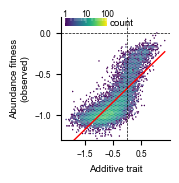

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

predicted_phenotypes_scaled=predicted_phenotypes_scaled.sort_values(['mean_dG'])
x=predicted_phenotypes_scaled[['mean_dG']].to_numpy()
y=predicted_phenotypes_scaled[['fitness']].to_numpy()


model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),y_pred.ravel())

fig, ax = plt.subplots(figsize=(1.4,1.6))    

hbin=ax.hexbin(predicted_phenotypes_scaled['mean_dG'],predicted_phenotypes_scaled['fitness'],bins='log',gridsize=75, cmap='viridis',rasterized=True,linewidths=0, vmax=100)

plt.plot(x, y_pred, '-',c='r', linewidth=1)
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0,  ls='--', color='black', linewidth=0.5)
plt.xlabel('Additive trait', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,1.5,1))
ax.set_ylim(-1.3,0.2)
#ax.set_yticks(np.arange(-4,1,1))
ax.set_rasterization_zorder(0)
ax.spines[['top','right']].set_visible(False)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_Linear.svg', dpi=300, transparent=True, bbox_inches='tight')

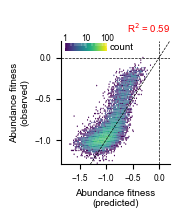

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

overall_full_model_performance = pd.DataFrame()

y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['fitness']].to_numpy()
x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy()
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

fig, ax = plt.subplots(figsize=(1.4,1.6))
hbin=ax.hexbin(x=predicted_phenotypes_scaled['predicted_fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],y=predicted_phenotypes_scaled['fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)
ax.axline((0.1, 0.1), slope=1, linestyle = "dashed", color = 'black',lw=0.5)


plt.axvline(0, ls='--', color='black', lw=0.5)
plt.axhline(0, ls='--', color='black', lw=0.5)
plt.title('\nR$^2$ = '+str(round(r2_score(y,y_pred),2)),fontsize=7, color='r', loc='right')
overall_full_model_performance.at['1','All']=round(r2_score(y,y_pred),2)
plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,0.5,0.5))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.set_xlim(-1.85,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_Linear_performance.svg', dpi=300, transparent=True, bbox_inches='tight')


### CI-2A

In [57]:
import pandas as pd

predicted_phenotypes = pd.read_csv(path+'Fig3/CI-2A/CI-2A_mochi_linear/task_1/predictions/predicted_phenotypes_all.txt',
                                  sep='\t', lineterminator='\n')

RT=303*0.001987
predicted_phenotypes['mean_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].mean(axis=1)
predicted_phenotypes['std_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].std(axis=1)

predicted_phenotypes['mean']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].mean(axis=1)
predicted_phenotypes['std']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].std(axis=1)

predicted_phenotypes['mean_dG']= predicted_phenotypes['mean_additive_trait']*RT
predicted_phenotypes['std_dG']= predicted_phenotypes['std_additive_trait']*RT

for index, row in predicted_phenotypes.loc[predicted_phenotypes['WT']!=True].iterrows():
    predicted_phenotypes.at[index,'predicted_fitness']=row['fold_'+str(int(row['Fold']))]
    predicted_phenotypes.at[index,'predicted_ddG']=row['fold_'+str(int(row['Fold']))+'_additive_trait0']*RT

predicted_phenotypes

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,fold_7_additive_trait0,fold_8_additive_trait0,fold_9_additive_trait0,fold_10_additive_trait0,mean_additive_trait,std_additive_trait,mean_dG,std_dG,predicted_fitness,predicted_ddG
0,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,3.0,NaN,False,False,False,False,270,...,0.733630,0.696908,0.722574,0.653967,0.714690,0.036245,0.430287,0.021822,-2.658252,0.419581
1,NaN,KTEWPELVGKSIEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,4.0,NaN,False,False,False,False,103,...,0.562238,0.526315,0.505457,0.463742,0.544247,0.044786,0.327670,0.026964,-2.780330,0.279201
2,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRI...,NaN,4.0,NaN,False,False,False,False,869,...,0.642648,0.504548,0.568511,0.493413,0.569969,0.063824,0.343156,0.038426,-2.768384,0.326928
3,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRV...,NaN,2.0,NaN,False,False,False,False,50,...,0.987888,0.897531,0.924360,0.949952,0.973647,0.062261,0.586195,0.037485,-2.614953,0.556521
4,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRV...,NaN,2.0,NaN,False,False,False,False,385,...,0.524875,0.439222,0.447320,0.519236,0.515663,0.056573,0.310461,0.034060,-2.816288,0.273081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6459,NaN,KTEWPELVGKSIEEAKKVLLQDKPEAQIIVLPVGTIVTMEYRIDRF...,NaN,5.0,NaN,False,False,False,False,45,...,-0.723767,-0.729204,-0.860552,-0.825837,-0.787109,0.084110,-0.473888,0.050639,-3.464698,-0.435752
6460,NaN,KTEWPELVGKSVEEAKKVVLQDKPEAQVIVLPVGTIVTMEYRIDRF...,NaN,6.0,NaN,False,False,False,False,60,...,-0.997530,-0.939194,-0.974937,-1.080625,-1.030480,0.081921,-0.620412,0.049321,-3.614882,-0.600574
6461,NaN,KTEWPELVGKSVEEAKKVLLQDKPEAQMIVLPVGTIVTMEYRIDRV...,NaN,5.0,NaN,False,False,False,False,64,...,-0.726178,-0.800886,-0.894831,-0.826311,-0.820472,0.083225,-0.493974,0.050106,-3.488671,-0.541813
6462,NaN,KTEWPELVGKSMEEAKKVFLQDKPEAQIIVLPVGTIVTMEYRIDRF...,NaN,6.0,NaN,False,False,False,False,68,...,-1.498316,-1.444921,-1.660896,-1.603337,-1.632382,0.144889,-0.982793,0.087232,-3.924230,-1.001508


In [58]:
import matplotlib.pyplot as plt
from seaborn import kdeplot
import numpy as np

# Normalize data in the -1 to 0 range

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

predicted_phenotypes_scaled = predicted_phenotypes.copy()

reference=predicted_phenotypes.loc[predicted_phenotypes['WT']==True].iloc[0]['core']

fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['fitness']=normalize(list(predicted_phenotypes_scaled['fitness']),{'actual': {'lower': mode, 'upper': predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})


fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='predicted_fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['predicted_fitness']=normalize(list(predicted_phenotypes_scaled['predicted_fitness']),{'actual': {'lower': mode, 'upper': 0}, 'desired': {'lower': -1, 'upper': 0}})


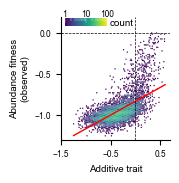

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

predicted_phenotypes_scaled=predicted_phenotypes_scaled.sort_values(['mean_dG'])
x=predicted_phenotypes_scaled[['mean_dG']].to_numpy()
y=predicted_phenotypes_scaled[['fitness']].to_numpy()


model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),y_pred.ravel())

fig, ax = plt.subplots(figsize=(1.4,1.6))    

hbin=ax.hexbin(predicted_phenotypes_scaled['mean_dG'],predicted_phenotypes_scaled['fitness'],bins='log',gridsize=75, cmap='viridis',rasterized=True,linewidths=0, vmax=100)

plt.plot(x, y_pred, '-',c='r', linewidth=1)
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0,  ls='--', color='black', linewidth=0.5)
plt.xlabel('Additive trait', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,1.5,1))
ax.set_ylim(-1.3,0.2)
#ax.set_yticks(np.arange(-4,1,1))
ax.set_rasterization_zorder(0)
ax.spines[['top','right']].set_visible(False)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('CI-2A_Mochi_Linear.svg', dpi=300, transparent=True, bbox_inches='tight')

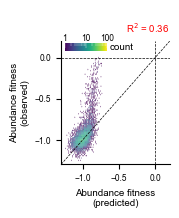

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

overall_full_model_performance = pd.DataFrame()

y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['fitness']].to_numpy()
x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy()
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

fig, ax = plt.subplots(figsize=(1.4,1.6))
hbin=ax.hexbin(x=predicted_phenotypes_scaled['predicted_fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],y=predicted_phenotypes_scaled['fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)
ax.axline((0.1, 0.1), slope=1, linestyle = "dashed", color = 'black',lw=0.5)


plt.axvline(0, ls='--', color='black', lw=0.5)
plt.axhline(0, ls='--', color='black', lw=0.5)
plt.title('\nR$^2$ = '+str(round(r2_score(y,y_pred),2)),fontsize=7, color='r', loc='right')
overall_full_model_performance.at['1','All']=round(r2_score(y,y_pred),2)
plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,0.5,0.5))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.set_xlim(-1.3,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('CI-2A_Mochi_Linear_performance_reps12.svg', dpi=300, transparent=True, bbox_inches='tight')


## Panel c

### FYN-SH3

In [61]:
import pandas as pd

predicted_phenotypes = pd.read_csv(path+'Fig3/FYN-SH3/FYN_mochi_order1/task_1/predictions/predicted_phenotypes_all.txt',
                                  sep='\t', lineterminator='\n')

RT=303*0.001987
predicted_phenotypes['mean_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].mean(axis=1)
predicted_phenotypes['std_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].std(axis=1)

predicted_phenotypes['mean']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].mean(axis=1)
predicted_phenotypes['std']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].std(axis=1)

predicted_phenotypes['mean_dG']= predicted_phenotypes['mean_additive_trait']*RT
predicted_phenotypes['std_dG']= predicted_phenotypes['std_additive_trait']*RT

for index, row in predicted_phenotypes.loc[predicted_phenotypes['WT']!=True].iterrows():
    predicted_phenotypes.at[index,'predicted_fitness']=row['fold_'+str(int(row['Fold']))]
    predicted_phenotypes.at[index,'predicted_ddG']=row['fold_'+str(int(row['Fold']))+'_additive_trait0']*RT

predicted_phenotypes

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,fold_7_additive_trait0,fold_8_additive_trait0,fold_9_additive_trait0,fold_10_additive_trait0,mean_additive_trait,std_additive_trait,mean_dG,std_dG,predicted_fitness,predicted_ddG
0,NaN,TLMVALYDYEARTEDDLSLHKGEKLQVLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,50.0,...,-2.831006,-2.788593,-2.897381,-2.836129,-2.957666,0.115480,-1.780695,0.069526,-0.433619,-1.744400
1,NaN,TLMVALYDYEARTEDDLSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,4.0,NaN,NaN,True,False,False,36.0,...,-2.435461,-2.377682,-2.465868,-2.349027,-2.482435,0.081175,-1.494577,0.048872,-0.527445,-1.466296
2,NaN,TLMVALYDYEARTEDDMSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,5.0,NaN,NaN,True,False,False,224.0,...,-2.792683,-2.706529,-2.792753,-2.606716,-2.774528,0.076831,-1.670435,0.046257,-0.489902,-1.682840
3,NaN,TLFVALYDYEARTEDDMSLHKGEKIQVLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,64.0,...,-1.642435,-1.556246,-1.553330,-1.591075,-1.669080,0.081562,-1.004888,0.049105,-0.779491,-1.065467
4,NaN,TLMVALYDYEARTEDDFSFHKGEKFQVLNSSEGDWWEARSLTTGET...,NaN,4.0,NaN,NaN,True,False,False,67.0,...,-1.623661,-1.433573,-1.537462,-1.431393,-1.621169,0.141256,-0.976043,0.085045,-0.833510,-0.950395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,NaN,TLVVALYDYEARTEDDVSFHKGEKMQMLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,141.0,...,4.214604,4.498672,4.572710,4.398816,4.453774,0.102871,2.681444,0.061935,-3.566619,2.648355
9969,NaN,TLIVALYDYEARTEDDISIHKGEKVQLLNSSEGDWWEARSLTTGET...,NaN,7.0,NaN,NaN,True,False,False,92.0,...,1.218080,1.103954,1.158172,1.197857,1.214304,0.115461,0.731085,0.069515,-2.871353,0.766125
9970,NaN,TLFVALYDYEARTEDDVSVHKGEKLQFLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,73.0,...,4.704999,4.813965,4.873496,4.794803,4.929351,0.139251,2.967770,0.083838,-3.581401,2.933290
9971,NaN,TLIVALYDYEARTEDDVSMHKGEKFQLLNSSEGDWWEARSLTTGET...,NaN,5.0,NaN,NaN,True,False,False,82.0,...,4.623081,4.621465,4.611381,4.680186,4.776906,0.147227,2.875989,0.088640,-3.571214,2.896649


In [62]:
import matplotlib.pyplot as plt
from seaborn import kdeplot
import numpy as np

# Normalize data in the -1 to 0 range

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

predicted_phenotypes_scaled = predicted_phenotypes.copy()

reference=predicted_phenotypes.loc[predicted_phenotypes['WT']==True].iloc[0]['core']

fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['fitness']=normalize(list(predicted_phenotypes_scaled['fitness']),{'actual': {'lower': mode, 'upper': predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})


fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='predicted_fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['predicted_fitness']=normalize(list(predicted_phenotypes_scaled['predicted_fitness']),{'actual': {'lower': mode, 'upper': 0}, 'desired': {'lower': -1, 'upper': 0}})


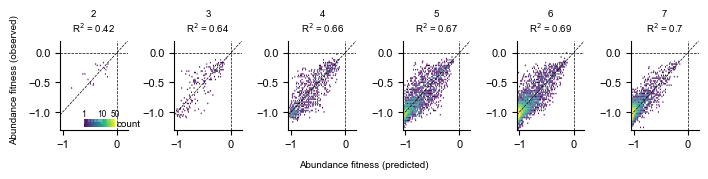

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
import math
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Arial'

ylim=(min(predicted_phenotypes_scaled['fitness']),max(predicted_phenotypes_scaled['fitness']))
xlim=(min(predicted_phenotypes_scaled['predicted_fitness']),max(predicted_phenotypes_scaled['predicted_fitness']))

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(7,1.7))
coliterator=0
rowiterator=0
fyn_model_performance_by_nham=pd.DataFrame()
for hamm_dist in range(2,8,1):    
    y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']==hamm_dist][['fitness']].to_numpy()
    x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']==hamm_dist][['predicted_fitness']].to_numpy()
    
    model = LinearRegression()
    model.fit(x,y)
    
    y_pred = model.predict(x)
    
    hbin=ax[coliterator].hexbin(x,y,gridsize=50,bins='log', vmax=50, rasterized=True,linewidths=0, extent=[min(predicted_phenotypes_scaled['predicted_fitness']),max(predicted_phenotypes_scaled['predicted_fitness']),min(predicted_phenotypes_scaled['fitness']),max(predicted_phenotypes_scaled['fitness'])])
    ax[coliterator].set_title(str(hamm_dist)+'\nR$^2$ = '+str(round(r2_score(y,y_pred),2)), fontsize=7)
    ax[coliterator].axline((0, 0), slope=1,ls='dashed',color='k',lw=0.5)
    ax[coliterator].spines[['right','top']].set_visible(False)
    ax[coliterator].tick_params(axis='x', labelsize=8)
    ax[coliterator].tick_params(axis='y', labelsize=8)
    ax[coliterator].axhline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].axvline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].set_rasterization_zorder(0)
    ax[coliterator].set_ylim(-1.3,0.2)
    ax[coliterator].set_xlim(-1.05,0.2)
    fyn_model_performance_by_nham.at['1',hamm_dist]=round(r2_score(y,y_pred),2)
    coliterator+=1

fmt = '%1.f'
cax=fig.add_axes([0.1,0.22,0.045,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
#cb.ax.set_title('Count', fontsize=7)
#cb.set_label('count', rotation=0, fontsize=7, labelpad=2)
#cb.ax.xaxis.set_label_position('right')
cb.set_ticks([1,10,50])
cb.set_ticklabels([1,10,50], fontsize=6, rotation=0)
ax1 = cb.ax
ax1.text(60,0.1,'count',rotation=0, fontsize=7)

fig.text(0.5, -0.015, 'Abundance fitness (predicted)', ha='center', fontsize=7)
fig.text(-0.005, 0.5, 'Abundance fitness (observed)', va='center', rotation='vertical', fontsize=7)
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_abundanceFitness_vs_Mochipredictedfitness_byNham_correl_1stordermodel.svg', dpi=300, transparent=True, bbox_inches='tight')

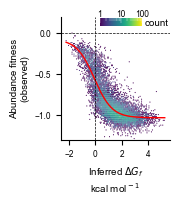

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

predicted_phenotypes_scaled=predicted_phenotypes_scaled.sort_values(['mean_dG'])
x=predicted_phenotypes_scaled['mean_dG']
y=predicted_phenotypes_scaled['fitness']
def sigmoid(x, L ,x0, k, b): ##https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
    z = L / (1 + np.exp(-k*(x-x0))) + b
    return (z)

p0 = [max(y), np.median(x),0,min(y)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, x, y,p0, method='lm', maxfev=10000)
x_range = np.linspace(x.iloc[0],x.iloc[-1],1000)
y_sig = sigmoid(x_range, *popt)
deriv = np.diff(y_sig)/np.diff(x_range)

fig, ax = plt.subplots(figsize=(1.4,1.6))    

hbin=ax.hexbin(predicted_phenotypes_scaled['mean_dG'],predicted_phenotypes_scaled['fitness'],bins='log',gridsize=100, cmap='viridis',rasterized=True,linewidths=0, vmax=100)
plt.plot(x_range, y_sig, '-',c='r', linewidth=1)
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0,  ls='--', color='black', linewidth=0.5)
plt.xlabel(r'Inferred ${ΔG_{f}}$'+ '\n'+ r'kcal mol$^-$$^1$', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-2,6,2))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.4,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_1storder_reps12.svg', dpi=300, transparent=True, bbox_inches='tight')

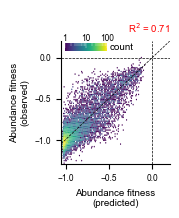

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

fyn_overall_full_model_performance = pd.DataFrame()

y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['fitness']].to_numpy()
x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy()
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

fig, ax = plt.subplots(figsize=(1.4,1.6))
hbin=ax.hexbin(x=predicted_phenotypes_scaled['predicted_fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],y=predicted_phenotypes_scaled['fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)
ax.axline((0.1, 0.1), slope=1, linestyle = "dashed", color = 'black',lw=0.5)


plt.axvline(0, ls='--', color='black', lw=0.5)
plt.axhline(0, ls='--', color='black', lw=0.5)
plt.title('\nR$^2$ = '+str(round(r2_score(y,y_pred),2)),fontsize=7, color='r', loc='right')
fyn_overall_full_model_performance.at['1','All']=round(r2_score(y,y_pred),2)
plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,0.5,0.5))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.set_xlim(-1.05,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_1storder_performance_reps12.svg', dpi=300, transparent=True, bbox_inches='tight')


### CI-2A

In [66]:
import pandas as pd

predicted_phenotypes = pd.read_csv(path+'Fig3/CI-2A/CI-2A_mochi_order1/task_1/predictions/predicted_phenotypes_all.txt',
                                  sep='\t', lineterminator='\n')

RT=303*0.001987
predicted_phenotypes['mean_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].mean(axis=1)
predicted_phenotypes['std_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].std(axis=1)

predicted_phenotypes['mean']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].mean(axis=1)
predicted_phenotypes['std']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].std(axis=1)

predicted_phenotypes['mean_dG']= predicted_phenotypes['mean_additive_trait']*RT
predicted_phenotypes['std_dG']= predicted_phenotypes['std_additive_trait']*RT

for index, row in predicted_phenotypes.loc[predicted_phenotypes['WT']!=True].iterrows():
    predicted_phenotypes.at[index,'predicted_fitness']=row['fold_'+str(int(row['Fold']))]
    predicted_phenotypes.at[index,'predicted_ddG']=row['fold_'+str(int(row['Fold']))+'_additive_trait0']*RT

predicted_phenotypes

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,fold_7_additive_trait0,fold_8_additive_trait0,fold_9_additive_trait0,fold_10_additive_trait0,mean_additive_trait,std_additive_trait,mean_dG,std_dG,predicted_fitness,predicted_ddG
0,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,3.0,NaN,False,False,False,False,270,...,-1.557988,-1.790232,-1.593958,-1.854061,-1.833981,0.200929,-1.104169,0.120971,-0.219244,-1.077829
1,NaN,KTEWPELVGKSIEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,4.0,NaN,False,False,False,False,103,...,-0.983272,-1.172697,-1.004076,-1.265975,-1.336808,0.275618,-0.804840,0.165939,-0.504130,-0.762194
2,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRI...,NaN,4.0,NaN,False,False,False,False,869,...,-1.683382,-2.016654,-1.984061,-2.310329,-2.125545,0.251918,-1.279708,0.151670,-0.124522,-1.193849
3,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRV...,NaN,2.0,NaN,False,False,False,False,50,...,-2.484969,-2.616188,-2.530184,-2.690007,-2.659686,0.184433,-1.601293,0.111040,0.147693,-1.523325
4,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRV...,NaN,2.0,NaN,False,False,False,False,385,...,-1.251085,-1.379306,-1.302617,-1.314202,-1.272901,0.148691,-0.766364,0.089521,-0.681974,-0.610359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6459,NaN,KTEWPELVGKSIEEAKKVLLQDKPEAQIIVLPVGTIVTMEYRIDRF...,NaN,5.0,NaN,False,False,False,False,45,...,5.919796,6.415248,6.473906,6.431738,6.228078,0.230020,3.749683,0.138486,-3.486447,3.564078
6460,NaN,KTEWPELVGKSVEEAKKVVLQDKPEAQVIVLPVGTIVTMEYRIDRF...,NaN,6.0,NaN,False,False,False,False,60,...,8.387184,9.333071,9.603070,9.276896,9.170116,0.436622,5.520969,0.262873,-3.495998,5.049596
6461,NaN,KTEWPELVGKSVEEAKKVLLQDKPEAQMIVLPVGTIVTMEYRIDRV...,NaN,5.0,NaN,False,False,False,False,64,...,4.950338,4.939596,5.200849,5.494652,5.178704,0.231413,3.117896,0.139324,-3.465582,3.083542
6462,NaN,KTEWPELVGKSMEEAKKVFLQDKPEAQIIVLPVGTIVTMEYRIDRF...,NaN,6.0,NaN,False,False,False,False,68,...,10.625258,11.497421,11.680516,12.166174,11.651004,0.584529,7.014615,0.351922,-3.480673,7.013401


In [67]:
import matplotlib.pyplot as plt
from seaborn import kdeplot
import numpy as np

# Normalize data in the -1 to 0 range

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

predicted_phenotypes_scaled = predicted_phenotypes.copy()

reference=predicted_phenotypes.loc[predicted_phenotypes['WT']==True].iloc[0]['core']

fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['fitness']=normalize(list(predicted_phenotypes_scaled['fitness']),{'actual': {'lower': mode, 'upper': predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})


fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='predicted_fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['predicted_fitness']=normalize(list(predicted_phenotypes_scaled['predicted_fitness']),{'actual': {'lower': mode, 'upper': 0}, 'desired': {'lower': -1, 'upper': 0}})


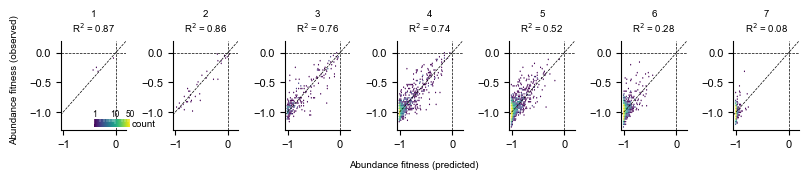

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
import math

plt.rcParams['font.family'] = 'Arial'

ylim=(min(predicted_phenotypes_scaled['fitness']),max(predicted_phenotypes_scaled['fitness']))
xlim=(min(predicted_phenotypes_scaled['predicted_fitness']),max(predicted_phenotypes_scaled['predicted_fitness']))

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(8,1.7))
coliterator=0
rowiterator=0
ci2a_model_performance_by_nham=pd.DataFrame()
for hamm_dist in range(1,8,1):    
    y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']==hamm_dist][['fitness']].to_numpy()
    x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']==hamm_dist][['predicted_fitness']].to_numpy()
    
    model = LinearRegression()
    model.fit(x,y)
    
    y_pred = model.predict(x)
    
    hbin=ax[coliterator].hexbin(x,y,gridsize=50,bins='log', vmax=50, rasterized=True,linewidths=0, extent=[min(predicted_phenotypes_scaled['predicted_fitness']),max(predicted_phenotypes_scaled['predicted_fitness']),min(predicted_phenotypes_scaled['fitness']),max(predicted_phenotypes_scaled['fitness'])])
    ax[coliterator].set_title(str(hamm_dist)+'\nR$^2$ = '+str(round(r2_score(y,y_pred),2)), fontsize=7)
    ax[coliterator].axline((0, 0), slope=1,ls='dashed',color='k',lw=0.5)
    ax[coliterator].spines[['right','top']].set_visible(False)
    ax[coliterator].tick_params(axis='x', labelsize=8)
    ax[coliterator].tick_params(axis='y', labelsize=8)
    ax[coliterator].axhline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].axvline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].set_rasterization_zorder(0)
    ax[coliterator].set_ylim(-1.3,0.2)
    ax[coliterator].set_xlim(-1.05,0.2)
    ci2a_model_performance_by_nham.at['1',hamm_dist]=round(r2_score(y,y_pred),2)
    coliterator+=1

fmt = '%1.f'
cax=fig.add_axes([0.1,0.22,0.045,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
#cb.ax.set_title('Count', fontsize=7)
#cb.set_label('count', rotation=0, fontsize=7, labelpad=2)
#cb.ax.xaxis.set_label_position('right')
cb.set_ticks([1,10,50])
cb.set_ticklabels([1,10,50], fontsize=6, rotation=0)
ax1 = cb.ax
ax1.text(60,0.1,'count',rotation=0, fontsize=7)

fig.text(0.5, -0.015, 'Abundance fitness (predicted)', ha='center', fontsize=7)
fig.text(-0.005, 0.5, 'Abundance fitness (observed)', va='center', rotation='vertical', fontsize=7)
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_abundanceFitness_vs_Mochipredictedfitness_byNham_correl_1stordermodel.svg', dpi=300, transparent=True, bbox_inches='tight')

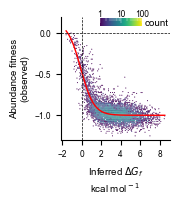

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

predicted_phenotypes_scaled=predicted_phenotypes_scaled.sort_values(['mean_dG'])
x=predicted_phenotypes_scaled['mean_dG']
y=predicted_phenotypes_scaled['fitness']
def sigmoid(x, L ,x0, k, b): ##https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
    z = L / (1 + np.exp(-k*(x-x0))) + b
    return (z)

p0 = [max(y), np.median(x),0,min(y)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, x, y,p0, method='lm', maxfev=10000)
x_range = np.linspace(x.iloc[0],x.iloc[-1],1000)
y_sig = sigmoid(x_range, *popt)
deriv = np.diff(y_sig)/np.diff(x_range)

fig, ax = plt.subplots(figsize=(1.4,1.6))    

hbin=ax.hexbin(predicted_phenotypes_scaled['mean_dG'],predicted_phenotypes_scaled['fitness'],bins='log',gridsize=100, cmap='viridis',rasterized=True,linewidths=0, vmax=100)
plt.plot(x_range, y_sig, '-',c='r', linewidth=1)
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0,  ls='--', color='black', linewidth=0.5)
plt.xlabel(r'Inferred ${ΔG_{f}}$'+ '\n'+ r'kcal mol$^-$$^1$', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-2,10,2))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.4,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('CI-2A_Mochi_1storder.svg', dpi=300, transparent=True, bbox_inches='tight')

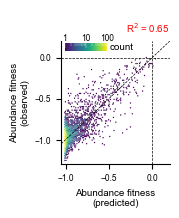

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

ci2a_overall_full_model_performance = pd.DataFrame()

y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['fitness']].to_numpy()
x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy()
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

fig, ax = plt.subplots(figsize=(1.4,1.6))
hbin=ax.hexbin(x=predicted_phenotypes_scaled['predicted_fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],y=predicted_phenotypes_scaled['fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)
ax.axline((0.1, 0.1), slope=1, linestyle = "dashed", color = 'black',lw=0.5)


plt.axvline(0, ls='--', color='black', lw=0.5)
plt.axhline(0, ls='--', color='black', lw=0.5)
plt.title('\nR$^2$ = '+str(round(r2_score(y,y_pred),2)),fontsize=7, color='r', loc='right')
ci2a_overall_full_model_performance.at['1','All']=round(r2_score(y,y_pred),2)
plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,0.5,0.5))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.set_xlim(-1.05,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('CI-2A_Mochi_1storder_performance.svg', dpi=300, transparent=True, bbox_inches='tight')


## Panel d

### FYN-SH3

In [71]:
import pandas as pd

predicted_phenotypes = pd.read_csv(path+'Fig3/FYN-SH3/FYN_mochi_order2/task_1/predictions/predicted_phenotypes_all.txt',
                                  sep='\t', lineterminator='\n')

RT=303*0.001987
predicted_phenotypes['mean_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].mean(axis=1)
predicted_phenotypes['std_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].std(axis=1)

predicted_phenotypes['mean']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].mean(axis=1)
predicted_phenotypes['std']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].std(axis=1)

predicted_phenotypes['mean_dG']= predicted_phenotypes['mean_additive_trait']*RT
predicted_phenotypes['std_dG']= predicted_phenotypes['std_additive_trait']*RT

for index, row in predicted_phenotypes.loc[predicted_phenotypes['WT']!=True].iterrows():
    predicted_phenotypes.at[index,'predicted_fitness']=row['fold_'+str(int(row['Fold']))]
    predicted_phenotypes.at[index,'predicted_ddG']=row['fold_'+str(int(row['Fold']))+'_additive_trait0']*RT

predicted_phenotypes

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,fold_7_additive_trait0,fold_8_additive_trait0,fold_9_additive_trait0,fold_10_additive_trait0,mean_additive_trait,std_additive_trait,mean_dG,std_dG,predicted_fitness,predicted_ddG
0,NaN,TLMVALYDYEARTEDDLSLHKGEKLQVLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,50.0,...,-2.784150,-2.958943,-3.210934,-2.804988,-3.115158,0.213077,-1.875515,0.128285,-0.459282,-1.933178
1,NaN,TLMVALYDYEARTEDDLSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,4.0,NaN,NaN,True,False,False,36.0,...,-2.006375,-2.312577,-2.117685,-2.045418,-2.218258,0.206063,-1.335527,0.124062,-0.632621,-1.207960
2,NaN,TLMVALYDYEARTEDDMSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,5.0,NaN,NaN,True,False,False,224.0,...,-2.987817,-3.079945,-3.305828,-2.688458,-3.099290,0.278324,-1.865961,0.167568,-0.490280,-2.000967
3,NaN,TLFVALYDYEARTEDDMSLHKGEKIQVLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,64.0,...,-2.940974,-3.298756,-3.517092,-3.208594,-3.537388,0.359165,-2.129723,0.216239,-0.433804,-2.443249
4,NaN,TLMVALYDYEARTEDDFSFHKGEKFQVLNSSEGDWWEARSLTTGET...,NaN,4.0,NaN,NaN,True,False,False,67.0,...,-2.892581,-2.859452,-2.684110,-2.714227,-2.827436,0.139478,-1.702289,0.083974,-0.556589,-1.711672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,NaN,TLVVALYDYEARTEDDVSFHKGEKMQMLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,141.0,...,4.053284,4.111182,4.964155,5.027062,4.664292,0.472268,2.808188,0.284334,-3.544592,3.026598
9969,NaN,TLIVALYDYEARTEDDISIHKGEKVQLLNSSEGDWWEARSLTTGET...,NaN,7.0,NaN,NaN,True,False,False,92.0,...,2.491967,2.628271,2.465177,3.288227,2.675561,0.319110,1.610851,0.192124,-3.286754,1.471143
9970,NaN,TLFVALYDYEARTEDDVSVHKGEKLQFLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,73.0,...,4.923657,5.171736,4.615001,5.253296,4.758500,0.444615,2.864907,0.267686,-3.520764,2.489847
9971,NaN,TLIVALYDYEARTEDDVSMHKGEKFQLLNSSEGDWWEARSLTTGET...,NaN,5.0,NaN,NaN,True,False,False,82.0,...,3.489404,3.832973,3.166289,3.752083,3.443738,0.624882,2.073341,0.376217,-3.235975,1.342577


In [72]:
import matplotlib.pyplot as plt
from seaborn import kdeplot
import numpy as np

# Normalize data in the -1 to 0 range

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

predicted_phenotypes_scaled = predicted_phenotypes.copy()

reference=predicted_phenotypes.loc[predicted_phenotypes['WT']==True].iloc[0]['core']

fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['fitness']=normalize(list(predicted_phenotypes_scaled['fitness']),{'actual': {'lower': mode, 'upper': predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})


fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='predicted_fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['predicted_fitness']=normalize(list(predicted_phenotypes_scaled['predicted_fitness']),{'actual': {'lower': mode, 'upper': 0}, 'desired': {'lower': -1, 'upper': 0}})


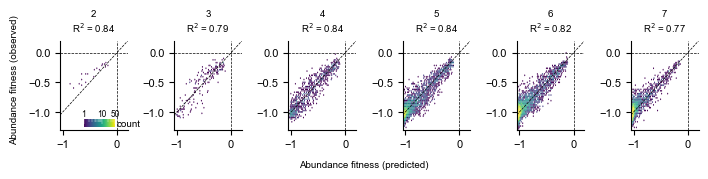

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
import math

plt.rcParams['font.family'] = 'Arial'

ylim=(min(predicted_phenotypes_scaled['fitness']),max(predicted_phenotypes_scaled['fitness']))
xlim=(min(predicted_phenotypes_scaled['predicted_fitness']),max(predicted_phenotypes_scaled['predicted_fitness']))

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(7,1.7))
coliterator=0
rowiterator=0
for hamm_dist in range(2,8,1):    
    y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']==hamm_dist][['fitness']].to_numpy()
    x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']==hamm_dist][['predicted_fitness']].to_numpy()
    
    model = LinearRegression()
    model.fit(x,y)
    
    y_pred = model.predict(x)
    
    hbin=ax[coliterator].hexbin(x,y,gridsize=50,bins='log', vmax=50, rasterized=True,linewidths=0, extent=[min(predicted_phenotypes_scaled['predicted_fitness']),max(predicted_phenotypes_scaled['predicted_fitness']),min(predicted_phenotypes_scaled['fitness']),max(predicted_phenotypes_scaled['fitness'])])
    ax[coliterator].set_title(str(hamm_dist)+'\nR$^2$ = '+str(round(r2_score(y,y_pred),2)), fontsize=7)
    ax[coliterator].axline((0, 0), slope=1,ls='dashed',color='k',lw=0.5)
    ax[coliterator].spines[['right','top']].set_visible(False)
    ax[coliterator].tick_params(axis='x', labelsize=8)
    ax[coliterator].tick_params(axis='y', labelsize=8)
    ax[coliterator].axhline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].axvline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].set_rasterization_zorder(0)
    ax[coliterator].set_ylim(-1.3,0.2)
    ax[coliterator].set_xlim(-1.05,0.2)
    fyn_model_performance_by_nham.at['2',hamm_dist]=round(r2_score(y,y_pred),2)
    coliterator+=1

fmt = '%1.f'
cax=fig.add_axes([0.1,0.22,0.045,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
#cb.ax.set_title('Count', fontsize=7)
#cb.set_label('count', rotation=0, fontsize=7, labelpad=2)
#cb.ax.xaxis.set_label_position('right')
cb.set_ticks([1,10,50])
cb.set_ticklabels([1,10,50], fontsize=6, rotation=0)
ax1 = cb.ax
ax1.text(60,0.1,'count',rotation=0, fontsize=7)

fig.text(0.5, -0.015, 'Abundance fitness (predicted)', ha='center', fontsize=7)
fig.text(-0.005, 0.5, 'Abundance fitness (observed)', va='center', rotation='vertical', fontsize=7)
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_abundanceFitness_vs_Mochipredictedfitness_byNham_correl_1stordermodel.svg', dpi=300, transparent=True, bbox_inches='tight')

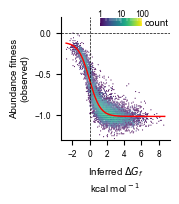

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

predicted_phenotypes_scaled=predicted_phenotypes_scaled.sort_values(['mean_dG'])
x=predicted_phenotypes_scaled['mean_dG']
y=predicted_phenotypes_scaled['fitness']
def sigmoid(x, L ,x0, k, b): ##https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
    z = L / (1 + np.exp(-k*(x-x0))) + b
    return (z)

p0 = [max(y), np.median(x),0,min(y)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, x, y,p0, method='lm', maxfev=10000)
x_range = np.linspace(x.iloc[0],x.iloc[-1],1000)
y_sig = sigmoid(x_range, *popt)
deriv = np.diff(y_sig)/np.diff(x_range)

fig, ax = plt.subplots(figsize=(1.4,1.6))    

hbin=ax.hexbin(predicted_phenotypes_scaled['mean_dG'],predicted_phenotypes_scaled['fitness'],bins='log',gridsize=100, cmap='viridis',rasterized=True,linewidths=0, vmax=100)
plt.plot(x_range, y_sig, '-',c='r', linewidth=1)
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0,  ls='--', color='black', linewidth=0.5)
plt.xlabel(r'Inferred ${ΔG_{f}}$'+ '\n'+ r'kcal mol$^-$$^1$', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-2,10,2))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.4,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
#cb.ax.set_title('Count', fontsize=7)
#cb.set_label('count', rotation=0, fontsize=7, labelpad=2)
#cb.ax.xaxis.set_label_position('right')
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndorder_reps12.svg', dpi=300, transparent=True, bbox_inches='tight')

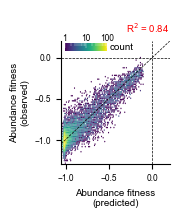

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['fitness']].to_numpy()
x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy()
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

fig, ax = plt.subplots(figsize=(1.4,1.6))
hbin=ax.hexbin(x=predicted_phenotypes_scaled['predicted_fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],y=predicted_phenotypes_scaled['fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)
ax.axline((0.1, 0.1), slope=1, linestyle = "dashed", color = 'black',lw=0.5)


plt.axvline(0, ls='--', color='black', lw=0.5)
plt.axhline(0, ls='--', color='black', lw=0.5)
plt.title('\nR$^2$ = '+str(round(r2_score(y,y_pred),2)),fontsize=7, color='r', loc='right')
fyn_overall_full_model_performance.at['2','All']=round(r2_score(y,y_pred),2)
plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,0.5,0.5))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.set_xlim(-1.05,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndorder_performance_reps12.svg', dpi=300, transparent=True, bbox_inches='tight')


### CI-2A

In [76]:
import pandas as pd

predicted_phenotypes = pd.read_csv(path+'Fig3/CI-2A/CI-2A_mochi_order2/task_1/predictions/predicted_phenotypes_all.txt',
                                  sep='\t', lineterminator='\n')

RT=303*0.001987
predicted_phenotypes['mean_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].mean(axis=1)
predicted_phenotypes['std_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].std(axis=1)

predicted_phenotypes['mean']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].mean(axis=1)
predicted_phenotypes['std']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].std(axis=1)

predicted_phenotypes['mean_dG']= predicted_phenotypes['mean_additive_trait']*RT
predicted_phenotypes['std_dG']= predicted_phenotypes['std_additive_trait']*RT

for index, row in predicted_phenotypes.loc[predicted_phenotypes['WT']!=True].iterrows():
    predicted_phenotypes.at[index,'predicted_fitness']=row['fold_'+str(int(row['Fold']))]
    predicted_phenotypes.at[index,'predicted_ddG']=row['fold_'+str(int(row['Fold']))+'_additive_trait0']*RT

predicted_phenotypes

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,fold_7_additive_trait0,fold_8_additive_trait0,fold_9_additive_trait0,fold_10_additive_trait0,mean_additive_trait,std_additive_trait,mean_dG,std_dG,predicted_fitness,predicted_ddG
0,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,3.0,NaN,False,False,False,False,270,...,-2.070529,-1.846793,-1.780581,-1.862454,-2.129327,0.292158,-1.281985,0.175897,-0.198940,-1.111882
1,NaN,KTEWPELVGKSIEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,4.0,NaN,False,False,False,False,103,...,-2.451217,-1.907630,-2.334221,-1.718335,-2.361304,0.334092,-1.421649,0.201144,-0.163690,-1.034542
2,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRI...,NaN,4.0,NaN,False,False,False,False,869,...,-3.793787,-2.950860,-3.313584,-2.690459,-3.687055,0.722862,-2.219832,0.435207,0.105854,-2.084268
3,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRV...,NaN,2.0,NaN,False,False,False,False,50,...,-3.062424,-3.049949,-2.974474,-2.516036,-2.916848,0.272672,-1.756120,0.164165,0.127507,-1.790815
4,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRV...,NaN,2.0,NaN,False,False,False,False,385,...,-2.762299,-2.764088,-2.508497,-1.969195,-2.365287,0.280958,-1.424047,0.169154,-0.224876,-1.209171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6459,NaN,KTEWPELVGKSIEEAKKVLLQDKPEAQIIVLPVGTIVTMEYRIDRF...,NaN,5.0,NaN,False,False,False,False,45,...,9.075356,4.934707,6.793098,6.163582,6.419055,1.482816,3.864662,0.892746,-3.525299,5.463918
6460,NaN,KTEWPELVGKSVEEAKKVVLQDKPEAQVIVLPVGTIVTMEYRIDRF...,NaN,6.0,NaN,False,False,False,False,60,...,10.672420,8.451508,10.267044,8.545732,9.848817,1.897514,5.929589,1.142419,-3.525645,6.425448
6461,NaN,KTEWPELVGKSVEEAKKVLLQDKPEAQMIVLPVGTIVTMEYRIDRV...,NaN,5.0,NaN,False,False,False,False,64,...,5.457539,5.532012,7.384053,5.620496,6.700982,1.139534,4.034400,0.686069,-3.526427,3.711821
6462,NaN,KTEWPELVGKSMEEAKKVFLQDKPEAQIIVLPVGTIVTMEYRIDRF...,NaN,6.0,NaN,False,False,False,False,68,...,16.642649,15.247056,14.463398,9.325267,16.353140,3.130625,9.845588,1.884827,-3.529056,10.178755


In [77]:
import matplotlib.pyplot as plt
from seaborn import kdeplot
import numpy as np

# Normalize data in the -1 to 0 range

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

predicted_phenotypes_scaled = predicted_phenotypes.copy()

reference=predicted_phenotypes.loc[predicted_phenotypes['WT']==True].iloc[0]['core']

fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['fitness']=normalize(list(predicted_phenotypes_scaled['fitness']),{'actual': {'lower': mode, 'upper': predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})


fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='predicted_fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['predicted_fitness']=normalize(list(predicted_phenotypes_scaled['predicted_fitness']),{'actual': {'lower': mode, 'upper': 0}, 'desired': {'lower': -1, 'upper': 0}})


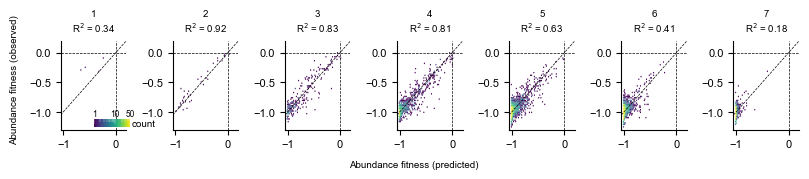

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
import math

plt.rcParams['font.family'] = 'Arial'

ylim=(min(predicted_phenotypes_scaled['fitness']),max(predicted_phenotypes_scaled['fitness']))
xlim=(min(predicted_phenotypes_scaled['predicted_fitness']),max(predicted_phenotypes_scaled['predicted_fitness']))

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(8,1.7))
coliterator=0
rowiterator=0
for hamm_dist in range(1,8,1):    
    y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']==hamm_dist][['fitness']].to_numpy()
    x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']==hamm_dist][['predicted_fitness']].to_numpy()
    
    model = LinearRegression()
    model.fit(x,y)
    
    y_pred = model.predict(x)
    
    hbin=ax[coliterator].hexbin(x,y,gridsize=50,bins='log', vmax=50, rasterized=True,linewidths=0, extent=[min(predicted_phenotypes_scaled['predicted_fitness']),max(predicted_phenotypes_scaled['predicted_fitness']),min(predicted_phenotypes_scaled['fitness']),max(predicted_phenotypes_scaled['fitness'])])
    ax[coliterator].set_title(str(hamm_dist)+'\nR$^2$ = '+str(round(r2_score(y,y_pred),2)), fontsize=7)
    ax[coliterator].axline((0, 0), slope=1,ls='dashed',color='k',lw=0.5)
    ax[coliterator].spines[['right','top']].set_visible(False)
    ax[coliterator].tick_params(axis='x', labelsize=8)
    ax[coliterator].tick_params(axis='y', labelsize=8)
    ax[coliterator].axhline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].axvline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].set_rasterization_zorder(0)
    ax[coliterator].set_ylim(-1.3,0.2)
    ax[coliterator].set_xlim(-1.05,0.2)
    ci2a_model_performance_by_nham.at['2',hamm_dist]=round(r2_score(y,y_pred),2)
    coliterator+=1

fmt = '%1.f'
cax=fig.add_axes([0.1,0.22,0.045,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
#cb.ax.set_title('Count', fontsize=7)
#cb.set_label('count', rotation=0, fontsize=7, labelpad=2)
#cb.ax.xaxis.set_label_position('right')
cb.set_ticks([1,10,50])
cb.set_ticklabels([1,10,50], fontsize=6, rotation=0)
ax1 = cb.ax
ax1.text(60,0.1,'count',rotation=0, fontsize=7)

fig.text(0.5, -0.015, 'Abundance fitness (predicted)', ha='center', fontsize=7)
fig.text(-0.005, 0.5, 'Abundance fitness (observed)', va='center', rotation='vertical', fontsize=7)
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_abundanceFitness_vs_Mochipredictedfitness_byNham_correl_1stordermodel.svg', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

predicted_phenotypes_scaled=predicted_phenotypes_scaled.sort_values(['mean_dG'])
x=predicted_phenotypes_scaled['mean_dG']
y=predicted_phenotypes_scaled['fitness']
def sigmoid(x, L ,x0, k, b): ##https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
    z = L / (1 + np.exp(-k*(x-x0))) + b
    return (z)

p0 = [max(y), np.median(x),0,min(y)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, x, y,p0, method='lm', maxfev=10000)
x_range = np.linspace(x.iloc[0],x.iloc[-1],1000)
y_sig = sigmoid(x_range, *popt)
deriv = np.diff(y_sig)/np.diff(x_range)

fig, ax = plt.subplots(figsize=(1.4,1.6))    

hbin=ax.hexbin(predicted_phenotypes_scaled['mean_dG'],predicted_phenotypes_scaled['fitness'],bins='log',gridsize=100, cmap='viridis',rasterized=True,linewidths=0, vmax=100)
plt.plot(x_range, y_sig, '-',c='r', linewidth=1)
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0,  ls='--', color='black', linewidth=0.5)
plt.xlabel(r'Inferred ${ΔG_{f}}$'+ '\n'+ r'kcal mol$^-$$^1$', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-3,21,3))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.4,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('CI-2A_Mochi_1storder.svg', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['fitness']].to_numpy()
x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy()
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

fig, ax = plt.subplots(figsize=(1.4,1.6))
hbin=ax.hexbin(x=predicted_phenotypes_scaled['predicted_fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],y=predicted_phenotypes_scaled['fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)
ax.axline((0.1, 0.1), slope=1, linestyle = "dashed", color = 'black',lw=0.5)


plt.axvline(0, ls='--', color='black', lw=0.5)
plt.axhline(0, ls='--', color='black', lw=0.5)
plt.title('\nR$^2$ = '+str(round(r2_score(y,y_pred),2)),fontsize=7, color='r', loc='right')
ci2a_overall_full_model_performance.at['2','All']=round(r2_score(y,y_pred),2)
plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,0.5,0.5))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.set_xlim(-1.05,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('CI-2A_Mochi_2ndorder_performance.svg', dpi=300, transparent=True, bbox_inches='tight')


## Panel e

### 2nd order sparse regularized model performance

#### FYN-SH3

In [ ]:
import pandas as pd

predicted_phenotypes = pd.read_csv(path+'Fig3/FYN-SH3/FYN_mochi_order2_sparse_regularized/task_4/predictions/predicted_phenotypes_all.txt',
                                  sep='\t', lineterminator='\n')

RT=303*0.001987
predicted_phenotypes['mean_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].mean(axis=1)
predicted_phenotypes['std_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].std(axis=1)

predicted_phenotypes['mean']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].mean(axis=1)
predicted_phenotypes['std']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].std(axis=1)

predicted_phenotypes['mean_dG']= predicted_phenotypes['mean_additive_trait']*RT
predicted_phenotypes['std_dG']= predicted_phenotypes['std_additive_trait']*RT

for index, row in predicted_phenotypes.loc[predicted_phenotypes['WT']!=True].iterrows():
    predicted_phenotypes.at[index,'predicted_fitness']=row['fold_'+str(int(row['Fold']))]
    predicted_phenotypes.at[index,'predicted_ddG']=row['fold_'+str(int(row['Fold']))+'_additive_trait0']*RT

predicted_phenotypes

In [ ]:
import matplotlib.pyplot as plt
from seaborn import kdeplot
import numpy as np

# Normalize data in the -1 to 0 range

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

predicted_phenotypes_scaled = predicted_phenotypes.copy()

reference=predicted_phenotypes.loc[predicted_phenotypes['WT']==True].iloc[0]['core']

fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['fitness']=normalize(list(predicted_phenotypes_scaled['fitness']),{'actual': {'lower': mode, 'upper': predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})


fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='predicted_fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['predicted_fitness']=normalize(list(predicted_phenotypes_scaled['predicted_fitness']),{'actual': {'lower': mode, 'upper': 0}, 'desired': {'lower': -1, 'upper': 0}})


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
import math

plt.rcParams['font.family'] = 'Arial'

ylim=(min(predicted_phenotypes_scaled['fitness']),max(predicted_phenotypes_scaled['fitness']))
xlim=(min(predicted_phenotypes_scaled['predicted_fitness']),max(predicted_phenotypes_scaled['predicted_fitness']))

fyn_sparse_model_performance_by_nham=pd.DataFrame()

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(7,1.7))
coliterator=0
rowiterator=0
for hamm_dist in range(2,8,1):    
    y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']==hamm_dist][['fitness']].to_numpy()
    x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']==hamm_dist][['predicted_fitness']].to_numpy()
    
    model = LinearRegression()
    model.fit(x,y)
    
    y_pred = model.predict(x)
    
    hbin=ax[coliterator].hexbin(x,y,gridsize=50,bins='log', vmax=50, rasterized=True,linewidths=0, extent=[min(predicted_phenotypes_scaled['predicted_fitness']),max(predicted_phenotypes_scaled['predicted_fitness']),min(predicted_phenotypes_scaled['fitness']),max(predicted_phenotypes_scaled['fitness'])])
    ax[coliterator].set_title(str(hamm_dist)+'\nR$^2$ = '+str(round(r2_score(y,y_pred),2)), fontsize=7)
    ax[coliterator].axline((0, 0), slope=1,ls='dashed',color='k',lw=0.5)
    ax[coliterator].spines[['right','top']].set_visible(False)
    ax[coliterator].tick_params(axis='x', labelsize=8)
    ax[coliterator].tick_params(axis='y', labelsize=8)
    ax[coliterator].axhline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].axvline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].set_rasterization_zorder(0)
    ax[coliterator].set_ylim(-1.3,0.2)
    ax[coliterator].set_xlim(-1.05,0.2)
    fyn_sparse_model_performance_by_nham.at['2',hamm_dist]=round(r2_score(y,y_pred),2)
    coliterator+=1

fmt = '%1.f'
cax=fig.add_axes([0.1,0.22,0.045,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
#cb.ax.set_title('Count', fontsize=7)
#cb.set_label('count', rotation=0, fontsize=7, labelpad=2)
#cb.ax.xaxis.set_label_position('right')
cb.set_ticks([1,10,50])
cb.set_ticklabels([1,10,50], fontsize=6, rotation=0)
ax1 = cb.ax
ax1.text(60,0.1,'count',rotation=0, fontsize=7)

fig.text(0.5, -0.015, 'Abundance fitness (predicted)', ha='center', fontsize=7)
fig.text(-0.005, 0.5, 'Abundance fitness (observed)', va='center', rotation='vertical', fontsize=7)
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_abundanceFitness_vs_Mochipredictedfitness_byNham_correl_2ndordersprsregmodel.svg', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

predicted_phenotypes_scaled=predicted_phenotypes_scaled.sort_values(['mean_dG'])
x=predicted_phenotypes_scaled['mean_dG']
y=predicted_phenotypes_scaled['fitness']
def sigmoid(x, L ,x0, k, b): ##https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
    z = L / (1 + np.exp(-k*(x-x0))) + b
    return (z)

p0 = [max(y), np.median(x),0,min(y)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, x, y,p0, method='lm', maxfev=10000)
x_range = np.linspace(x.iloc[0],x.iloc[-1],1000)
y_sig = sigmoid(x_range, *popt)
deriv = np.diff(y_sig)/np.diff(x_range)

fig, ax = plt.subplots(figsize=(1.4,1.6))    

hbin=ax.hexbin(predicted_phenotypes_scaled['mean_dG'],predicted_phenotypes_scaled['fitness'],bins='log',gridsize=100, cmap='viridis',rasterized=True,linewidths=0, vmax=100)
plt.plot(x_range, y_sig, '-',c='r', linewidth=1)
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0,  ls='--', color='black', linewidth=0.5)
plt.xlabel(r'Inferred ${ΔG_{f}}$'+ '\n'+ r'kcal mol$^-$$^1$', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-2,10,2))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.4,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
#cb.ax.set_title('Count', fontsize=7)
#cb.set_label('count', rotation=0, fontsize=7, labelpad=2)
#cb.ax.xaxis.set_label_position('right')
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndorder_reps12.svg', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

fyn_overall_sparse_model_performance=pd.DataFrame()

y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['fitness']].to_numpy()
x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy()
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

fig, ax = plt.subplots(figsize=(1.4,1.6))
hbin=ax.hexbin(x=predicted_phenotypes_scaled['predicted_fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],y=predicted_phenotypes_scaled['fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)
ax.axline((0.1, 0.1), slope=1, linestyle = "dashed", color = 'black',lw=0.5)


plt.axvline(0, ls='--', color='black', lw=0.5)
plt.axhline(0, ls='--', color='black', lw=0.5)
plt.title('\nR$^2$ = '+str(round(r2_score(y,y_pred),2)),fontsize=7, color='r', loc='right')
fyn_overall_sparse_model_performance.at['2','All']=round(r2_score(y,y_pred),2)
plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,0.5,0.5))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.set_xlim(-1.05,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndordersprsreg_performance.svg', dpi=300, transparent=True, bbox_inches='tight')


#### CI-2A

In [ ]:
import pandas as pd

predicted_phenotypes = pd.read_csv(path+'Fig3/CI-2A/CI-2A_mochi_order2_sparse_regularized/task_4/predictions/predicted_phenotypes_all.txt',
                                  sep='\t', lineterminator='\n')

RT=303*0.001987
predicted_phenotypes['mean_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].mean(axis=1)
predicted_phenotypes['std_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].std(axis=1)

predicted_phenotypes['mean']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].mean(axis=1)
predicted_phenotypes['std']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].std(axis=1)

predicted_phenotypes['mean_dG']= predicted_phenotypes['mean_additive_trait']*RT
predicted_phenotypes['std_dG']= predicted_phenotypes['std_additive_trait']*RT

for index, row in predicted_phenotypes.loc[predicted_phenotypes['WT']!=True].iterrows():
    predicted_phenotypes.at[index,'predicted_fitness']=row['fold_'+str(int(row['Fold']))]
    predicted_phenotypes.at[index,'predicted_ddG']=row['fold_'+str(int(row['Fold']))+'_additive_trait0']*RT

predicted_phenotypes

In [ ]:
import matplotlib.pyplot as plt
from seaborn import kdeplot
import numpy as np

# Normalize data in the -1 to 0 range

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

predicted_phenotypes_scaled = predicted_phenotypes.copy()

reference=predicted_phenotypes.loc[predicted_phenotypes['WT']==True].iloc[0]['core']

fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['fitness']=normalize(list(predicted_phenotypes_scaled['fitness']),{'actual': {'lower': mode, 'upper': predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})


fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='predicted_fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['predicted_fitness']=normalize(list(predicted_phenotypes_scaled['predicted_fitness']),{'actual': {'lower': mode, 'upper': 0}, 'desired': {'lower': -1, 'upper': 0}})


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
import math

plt.rcParams['font.family'] = 'Arial'

ylim=(min(predicted_phenotypes_scaled['fitness']),max(predicted_phenotypes_scaled['fitness']))
xlim=(min(predicted_phenotypes_scaled['predicted_fitness']),max(predicted_phenotypes_scaled['predicted_fitness']))

ci2a_sparse_model_performance_by_nham=pd.DataFrame()

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(8,1.7))
coliterator=0
rowiterator=0
for hamm_dist in range(1,8,1):    
    y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']==hamm_dist][['fitness']].to_numpy()
    x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']==hamm_dist][['predicted_fitness']].to_numpy()
    
    model = LinearRegression()
    model.fit(x,y)
    
    y_pred = model.predict(x)
    
    hbin=ax[coliterator].hexbin(x,y,gridsize=50,bins='log', vmax=50, rasterized=True,linewidths=0, extent=[min(predicted_phenotypes_scaled['predicted_fitness']),max(predicted_phenotypes_scaled['predicted_fitness']),min(predicted_phenotypes_scaled['fitness']),max(predicted_phenotypes_scaled['fitness'])])
    ax[coliterator].set_title(str(hamm_dist)+'\nR$^2$ = '+str(round(r2_score(y,y_pred),2)), fontsize=7)
    ax[coliterator].axline((0, 0), slope=1,ls='dashed',color='k',lw=0.5)
    ax[coliterator].spines[['right','top']].set_visible(False)
    ax[coliterator].tick_params(axis='x', labelsize=8)
    ax[coliterator].tick_params(axis='y', labelsize=8)
    ax[coliterator].axhline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].axvline(0, ls='--', color='k',lw=0.5)
    ax[coliterator].set_rasterization_zorder(0)
    ax[coliterator].set_ylim(-1.3,0.2)
    ax[coliterator].set_xlim(-1.05,0.2)
    ci2a_sparse_model_performance_by_nham.at['2',hamm_dist]=round(r2_score(y,y_pred),2)
    coliterator+=1

fmt = '%1.f'
cax=fig.add_axes([0.1,0.22,0.045,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
#cb.ax.set_title('Count', fontsize=7)
#cb.set_label('count', rotation=0, fontsize=7, labelpad=2)
#cb.ax.xaxis.set_label_position('right')
cb.set_ticks([1,10,50])
cb.set_ticklabels([1,10,50], fontsize=6, rotation=0)
ax1 = cb.ax
ax1.text(60,0.1,'count',rotation=0, fontsize=7)

fig.text(0.5, -0.015, 'Abundance fitness (predicted)', ha='center', fontsize=7)
fig.text(-0.005, 0.5, 'Abundance fitness (observed)', va='center', rotation='vertical', fontsize=7)
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('CI-2A_abundanceFitness_vs_Mochipredictedfitness_byNham_correl_2ndordersprsregmodel.svg', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

predicted_phenotypes_scaled=predicted_phenotypes_scaled.sort_values(['mean_dG'])
x=predicted_phenotypes_scaled['mean_dG']
y=predicted_phenotypes_scaled['fitness']
def sigmoid(x, L ,x0, k, b): ##https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
    z = L / (1 + np.exp(-k*(x-x0))) + b
    return (z)

p0 = [max(y), np.median(x),0,min(y)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, x, y,p0, method='lm', maxfev=10000)
x_range = np.linspace(x.iloc[0],x.iloc[-1],1000)
y_sig = sigmoid(x_range, *popt)
deriv = np.diff(y_sig)/np.diff(x_range)

fig, ax = plt.subplots(figsize=(1.4,1.6))    

hbin=ax.hexbin(predicted_phenotypes_scaled['mean_dG'],predicted_phenotypes_scaled['fitness'],bins='log',gridsize=100, cmap='viridis',rasterized=True,linewidths=0, vmax=100)
plt.plot(x_range, y_sig, '-',c='r', linewidth=1)
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0,  ls='--', color='black', linewidth=0.5)
plt.xlabel(r'Inferred ${ΔG_{f}}$'+ '\n'+ r'kcal mol$^-$$^1$', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-3,15,3))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.4,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
#cb.ax.set_title('Count', fontsize=7)
#cb.set_label('count', rotation=0, fontsize=7, labelpad=2)
#cb.ax.xaxis.set_label_position('right')
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('CI-2A_Mochi_2ndorder_reps12.svg', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

ci2a_overall_sparse_model_performance=pd.DataFrame()

y = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['fitness']].to_numpy()
x = predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['Nham_aa']>0][['predicted_fitness']].to_numpy()
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

fig, ax = plt.subplots(figsize=(1.4,1.6))
hbin=ax.hexbin(x=predicted_phenotypes_scaled['predicted_fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],y=predicted_phenotypes_scaled['fitness'].loc[predicted_phenotypes_scaled['Nham_aa']>0],bins='log',gridsize=75,rasterized=True,linewidths=0,vmax=100)
ax.axline((0.1, 0.1), slope=1, linestyle = "dashed", color = 'black',lw=0.5)


plt.axvline(0, ls='--', color='black', lw=0.5)
plt.axhline(0, ls='--', color='black', lw=0.5)
plt.title('\nR$^2$ = '+str(round(r2_score(y,y_pred),2)),fontsize=7, color='r', loc='right')
ci2a_overall_sparse_model_performance.at['2','All']=round(r2_score(y,y_pred),2)
plt.xlabel('Abundance fitness\n(predicted)', fontsize=7)
plt.xticks(fontsize=6)
plt.ylabel('Abundance fitness\n(observed)', fontsize=7)
plt.yticks(fontsize=6)
ax.set_xticks(np.arange(-1.5,0.5,0.5))
ax.set_yticks(np.arange(-1.5,0.5,0.5))
ax.set_ylim(-1.3,0.2)
ax.set_xlim(-1.05,0.2)
ax.spines[['top','right']].set_visible(False)
ax.set_rasterization_zorder(0)
fmt = '%1.f'
cax=fig.add_axes([0.15,0.82,0.3,0.05])
cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
cb.ax.xaxis.set_tick_params(pad=0)
cb.set_ticks([1,10,100])
cb.set_ticklabels([1,10,100], fontsize=6)
ax1 = cb.ax
ax1.text(140,0.1,'count',rotation=0, fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('CI-2A_Mochi_2ndordersprsreg_performance.svg', dpi=300, transparent=True, bbox_inches='tight')


### FYN-SH3

In [ ]:
import pandas as pd

predicted_phenotypes = pd.read_csv(path+'Fig3/FYN-SH3/FYN_mochi_order1/task_1/predictions/predicted_phenotypes_all.txt',
                                  sep='\t', lineterminator='\n')
predicted_phenotypes=predicted_phenotypes.iloc[:-1]

In [ ]:
cummulative_sigma = 0
for index, row in predicted_phenotypes.iterrows():
    cummulative_sigma = cummulative_sigma + (row.sigma**2)

MEV = predicted_phenotypes.var(numeric_only=True)['fitness'] - (cummulative_sigma/len(predicted_phenotypes.index))
all_order_FEV = MEV/predicted_phenotypes.var(numeric_only=True)['fitness']
all_order_FEV

In [ ]:
FEV_correction = pd.DataFrame()
for nham in range(2,8,1):
    nham_vars = predicted_phenotypes.loc[predicted_phenotypes['Nham_aa']==nham]
    
    cummulative_sigma = 0
    for index, row in nham_vars.iterrows():
        cummulative_sigma = cummulative_sigma + (row.sigma**2)
    
    MEV = nham_vars.var(numeric_only=True)['fitness'] - (cummulative_sigma/len(nham_vars.index))
    FEV = MEV/nham_vars.var(numeric_only=True)['fitness']
    FEV_correction.at[0,nham]=FEV
fyn_model_performance_by_nham.divide(FEV_correction.loc[0],axis=1)

In [ ]:
full_models_terms_by_order = pd.DataFrame(index=np.arange(1,3,1))

for order in range(1,3,1):
    coefs = pd.read_csv(path+'Fig3/FYN-SH3/FYN_mochi_order'+str(order)+'/task_1/weights/weights_Folding.txt',
                       sep='\t')
    coefs.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
    for index, row in coefs.iterrows():
        coefs.at[index,'order']=len(row.id.split('_'))
    full_models_terms_by_order[order]=coefs['order'].value_counts()
full_models_terms_by_order

In [ ]:
sparse_models_terms_by_order = pd.DataFrame(index=np.arange(1,3,1))

for order in range(2,3,1):
    coefs = pd.read_csv(path+'Fig3/FYN-SH3/FYN_mochi_order'+str(order)+'_sparse_regularized/task_4/weights/weights_Folding.txt',
                       sep='\t')
    coefs.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
    for index, row in coefs.iterrows():
        coefs.at[index,'order']=len(row.id.split('_'))
    sparse_models_terms_by_order[order]=coefs['order'].value_counts()
sparse_models_terms_by_order

In [ ]:
fig, ax = plt.subplot_mosaic([['top left', 'top centre', 'top right'],
                              ['middle left', 'middle centre', 'middle right'],
                              ['bottom left-centre', 'bottom left-centre', 'bottom right']],
                            width_ratios = [6, 1, 6],
                            height_ratios = [1,0.5,0.1],
                            figsize=(3.8,1.2))

sns.heatmap(fyn_model_performance_by_nham.divide(FEV_correction.loc[0],axis=1), annot=True, fmt=".2f", cmap='coolwarm_r', vmin=0, vmax=1,ax=ax['top left'], linewidths=1, linecolor='black', annot_kws={'color':'black', 'font':'Arial', 'size':6}, center=0.5, cbar=False)
sns.heatmap(fyn_sparse_model_performance_by_nham.divide(FEV_correction.loc[0],axis=1).apply(pd.to_numeric), annot=True, fmt=".2f", cmap='coolwarm_r', vmin=0, vmax=1,ax=ax['middle left'], linewidths=1, linecolor='black', annot_kws={'color':'black', 'font':'Arial', 'size':6}, center=0.5,cbar_ax=ax['bottom left-centre'],cbar_kws={"orientation": "horizontal", 'location':'bottom'})

#ax['top left'].set_xlabel('Mutation order', fontsize=7)
ax['top left'].xaxis.set_label_position('top')
ax['top left'].xaxis.set_ticks_position('top')
ax['top left'].tick_params(axis='both',labelsize=6, labelrotation=0)
ax['middle left'].tick_params(axis='both',labelsize=6, labelrotation=0)
ax['middle left'].set_xticks(ticks=[])
ax['bottom left-centre'].set_xticks(ticks=np.arange(0,1.25,.25),labels=np.arange(0,1.25,.25), fontsize=6)
ax['bottom left-centre'].set_xlabel('Fraction of variance explained (FVE)', rotation=0, labelpad=2, fontsize=7)
for spine in ax['bottom left-centre'].spines.values():
    spine.set(visible=True,lw=1,edgecolor='black')


sns.heatmap(fyn_overall_full_model_performance/all_order_FEV, annot=True, fmt=".2f", cmap='coolwarm_r', vmin=0, vmax=1,ax=ax['top centre'], linewidths=1, linecolor='black', annot_kws={'color':'black', 'font':'Arial', 'size':6}, center=0.5, cbar=False)
ax['top centre'].set_yticks(ticks=[])
ax['top centre'].xaxis.set_label_position('top')
ax['top centre'].xaxis.set_ticks_position('top')
ax['top centre'].tick_params(axis='both',labelsize=6, labelrotation=0)

sns.heatmap((fyn_overall_sparse_model_performance/all_order_FEV), annot=True, fmt=".2f", cmap='coolwarm_r', vmin=0, vmax=1,ax=ax['middle centre'], linewidths=1, linecolor='black', annot_kws={'color':'black', 'font':'Arial', 'size':6}, center=0.5, cbar=False)
ax['middle centre'].set_yticks(ticks=[])
ax['middle centre'].set_xticks(ticks=[])

full_models_terms_by_order.T.plot(kind='barh', stacked=True, cmap='cividis', ax=ax['top right'], legend=False, width=0.65)
ax['top right'].invert_yaxis()
ax['top right'].spines[['right','bottom','left']].set_visible(False)
ax['top right'].xaxis.set_label_position('top')
ax['top right'].xaxis.set_ticks_position('top')
ax['top right'].set_xlabel('Number of coefficients', fontsize=7)
ax['top right'].set_yticks(ticks=np.arange(0,2,1), labels=[])
ax['top right'].set_xticks(ticks=np.arange(0,400,50),labels=np.arange(0,400,50))
ax['top right'].set_xlim(0,360)
ax['top right'].tick_params(axis='both',labelsize=6, labelrotation=0)

sparse_models_terms_by_order.T.plot(kind='barh', stacked=True, cmap='cividis', ax=ax['middle right'], legend=False, width=0.6)
ax['middle right'].invert_yaxis()
handles, labels = ax['middle right'].get_legend_handles_labels()
ax['middle right'].spines[['right','top','left']].set_visible(False)
ax['middle right'].set_yticks(ticks=np.arange(0,1,1),labels=[])
ax['middle right'].set_xticks(ticks=np.arange(0,400,50),labels=np.arange(0,400,50), fontsize=6)
ax['middle right'].set_xlim(0,360)
ax['middle right'].xaxis.set_ticks_position('bottom')

ax['bottom right'].axis('off')
legend = ax['bottom right'].legend(handles, labels, title='Coefficient order', ncol=2, frameon=False, fontsize=6, bbox_to_anchor=(0.85,-1.5))
legend.get_title().set_fontsize('7')

fig.text(0.35, 1.075, 'Mutation order', ha='center', fontsize=7)
fig.text(0.1, 0.89, 'Model\norder', ha='center', fontsize=7)
fig.text(0.07, 0.3, 'Sparse\nregularized', va='center', ha='right', rotation='horizontal', fontsize=7)
fig.text(0.07, 0.65, 'Full\nmodels', va='center', ha='right', rotation='horizontal', fontsize=7)

plt.subplots_adjust(hspace=0.15, wspace= 0.05)

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_FEVmodelperformancesummary_reps12.svg', dpi=300, transparent=True, bbox_inches='tight')

### CI-2A

In [ ]:
import pandas as pd

predicted_phenotypes = pd.read_csv(path+'Fig3/CI-2A/CI-2A_mochi_order1/task_1/predictions/predicted_phenotypes_all.txt',
                                  sep='\t', lineterminator='\n')
predicted_phenotypes=predicted_phenotypes.iloc[:-1]

In [ ]:
cummulative_sigma = 0
for index, row in predicted_phenotypes.iterrows():
    cummulative_sigma = cummulative_sigma + (row.sigma**2)

MEV = predicted_phenotypes.var(numeric_only=True)['fitness'] - (cummulative_sigma/len(predicted_phenotypes.index))
all_order_FEV = MEV/predicted_phenotypes.var(numeric_only=True)['fitness']
all_order_FEV

In [ ]:
FEV_correction = pd.DataFrame()
for nham in range(1,8,1):
    nham_vars = predicted_phenotypes.loc[predicted_phenotypes['Nham_aa']==nham]
    
    cummulative_sigma = 0
    for index, row in nham_vars.iterrows():
        cummulative_sigma = cummulative_sigma + (row.sigma**2)
    
    MEV = nham_vars.var(numeric_only=True)['fitness'] - (cummulative_sigma/len(nham_vars.index))
    FEV = MEV/nham_vars.var(numeric_only=True)['fitness']
    FEV_correction.at[0,nham]=FEV
ci2a_model_performance_by_nham.divide(FEV_correction.loc[0],axis=1)

In [ ]:
full_models_terms_by_order = pd.DataFrame(index=np.arange(1,3,1))

for order in range(1,3,1):
    coefs = pd.read_csv(path+'Fig3/CI-2A/CI-2A_mochi_order'+str(order)+'/task_1/weights/weights_Folding.txt',
                       sep='\t')
    coefs.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
    for index, row in coefs.iterrows():
        coefs.at[index,'order']=len(row.id.split('_'))
    full_models_terms_by_order[order]=coefs['order'].value_counts()
full_models_terms_by_order

In [ ]:
sparse_models_terms_by_order = pd.DataFrame(index=np.arange(1,3,1))

for order in range(2,3,1):
    coefs = pd.read_csv(path+'Fig3/CI-2A/CI-2A_mochi_order'+str(order)+'_sparse_regularized/task_4/weights/weights_Folding.txt',
                       sep='\t')
    coefs.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
    for index, row in coefs.iterrows():
        coefs.at[index,'order']=len(row.id.split('_'))
    sparse_models_terms_by_order[order]=coefs['order'].value_counts()
sparse_models_terms_by_order

In [ ]:
fig, ax = plt.subplot_mosaic([['top left', 'top centre', 'top right'],
                              ['middle left', 'middle centre', 'middle right'],
                              ['bottom left-centre', 'bottom left-centre', 'bottom right']],
                            width_ratios = [6, 1, 6],
                            height_ratios = [1,0.5,0.1],
                            figsize=(3.8,1.2))

sns.heatmap(ci2a_model_performance_by_nham.divide(FEV_correction.loc[0],axis=1), annot=True, fmt=".2f", cmap='coolwarm_r', vmin=0, vmax=1,ax=ax['top left'], linewidths=1, linecolor='black', annot_kws={'color':'black', 'font':'Arial', 'size':6}, center=0.5, cbar=False)
sns.heatmap(ci2a_sparse_model_performance_by_nham.divide(FEV_correction.loc[0],axis=1).apply(pd.to_numeric), annot=True, fmt=".2f", cmap='coolwarm_r', vmin=0, vmax=1,ax=ax['middle left'], linewidths=1, linecolor='black', annot_kws={'color':'black', 'font':'Arial', 'size':6}, center=0.5,cbar_ax=ax['bottom left-centre'],cbar_kws={"orientation": "horizontal", 'location':'bottom'})

#ax['top left'].set_xlabel('Mutation order', fontsize=7)
ax['top left'].xaxis.set_label_position('top')
ax['top left'].xaxis.set_ticks_position('top')
ax['top left'].tick_params(axis='both',labelsize=6, labelrotation=0)
ax['middle left'].tick_params(axis='both',labelsize=6, labelrotation=0)
ax['middle left'].set_xticks(ticks=[])
ax['bottom left-centre'].set_xticks(ticks=np.arange(0,1.25,.25),labels=np.arange(0,1.25,.25), fontsize=6)
ax['bottom left-centre'].set_xlabel('Fraction of variance explained (FVE)', rotation=0, labelpad=2, fontsize=7)
for spine in ax['bottom left-centre'].spines.values():
    spine.set(visible=True,lw=1,edgecolor='black')


sns.heatmap(ci2a_overall_full_model_performance/all_order_FEV, annot=True, fmt=".2f", cmap='coolwarm_r', vmin=0, vmax=1,ax=ax['top centre'], linewidths=1, linecolor='black', annot_kws={'color':'black', 'font':'Arial', 'size':6}, center=0.5, cbar=False)
ax['top centre'].set_yticks(ticks=[])
ax['top centre'].xaxis.set_label_position('top')
ax['top centre'].xaxis.set_ticks_position('top')
ax['top centre'].tick_params(axis='both',labelsize=6, labelrotation=0)

sns.heatmap((ci2a_overall_sparse_model_performance/all_order_FEV), annot=True, fmt=".2f", cmap='coolwarm_r', vmin=0, vmax=1,ax=ax['middle centre'], linewidths=1, linecolor='black', annot_kws={'color':'black', 'font':'Arial', 'size':6}, center=0.5, cbar=False)
ax['middle centre'].set_yticks(ticks=[])
ax['middle centre'].set_xticks(ticks=[])

full_models_terms_by_order.T.plot(kind='barh', stacked=True, cmap='cividis', ax=ax['top right'], legend=False, width=0.65)
ax['top right'].invert_yaxis()
ax['top right'].spines[['right','bottom','left']].set_visible(False)
ax['top right'].xaxis.set_label_position('top')
ax['top right'].xaxis.set_ticks_position('top')
ax['top right'].set_xlabel('Number of coefficients', fontsize=7)
ax['top right'].set_yticks(ticks=np.arange(0,2,1), labels=[])
ax['top right'].set_xticks(ticks=np.arange(0,400,50),labels=np.arange(0,400,50))
ax['top right'].set_xlim(0,360)
ax['top right'].tick_params(axis='both',labelsize=6, labelrotation=0)

sparse_models_terms_by_order.T.plot(kind='barh', stacked=True, cmap='cividis', ax=ax['middle right'], legend=False, width=0.6)
ax['middle right'].invert_yaxis()
handles, labels = ax['middle right'].get_legend_handles_labels()
ax['middle right'].spines[['right','top','left']].set_visible(False)
ax['middle right'].set_yticks(ticks=np.arange(0,1,1),labels=[])
ax['middle right'].set_xticks(ticks=np.arange(0,400,50),labels=np.arange(0,400,50), fontsize=6)
ax['middle right'].set_xlim(0,360)
ax['middle right'].xaxis.set_ticks_position('bottom')

ax['bottom right'].axis('off')
legend = ax['bottom right'].legend(handles, labels, title='Coefficient order', ncol=2, frameon=False, fontsize=6, bbox_to_anchor=(0.85,-1.5))
legend.get_title().set_fontsize('7')

fig.text(0.35, 1.075, 'Mutation order', ha='center', fontsize=7)
fig.text(0.1, 0.89, 'Model\norder', ha='center', fontsize=7)
fig.text(0.07, 0.3, 'Sparse\nregularized', va='center', ha='right', rotation='horizontal', fontsize=7)
fig.text(0.07, 0.65, 'Full\nmodels', va='center', ha='right', rotation='horizontal', fontsize=7)

plt.subplots_adjust(hspace=0.15, wspace= 0.05)

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('CI-2A_FEVmodelperformancesummary_reps12.svg', dpi=300, transparent=True, bbox_inches='tight')